In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn import preprocessing
from tensorflow import keras

In [2]:
#reading dataframes

train_data = pd.read_pickle('train_all.pkl')
val_data = pd.read_pickle('val_all.pkl')
test_data =pd.read_pickle('test_all.pkl')

In [51]:
train_data.shape

(5051, 65537)

In [53]:
test_data.shape

(618, 65537)

In [3]:
# X and target y for training data
X_train= train_data.iloc[:,0:-1]
y_train= train_data.iloc[:, -1]

# X and target y for val data
X_val= val_data.iloc[:,0:-1]
y_val= val_data.iloc[:, -1]


# X and target y for test data
X_test= test_data.iloc[:,0:-1]
y_test= test_data.iloc[:, -1]

In [4]:
#X_train.head()

In [5]:
#Rescale values by dividing by 255

X_train =X_train.div(255)
X_val =X_val.div(255)
X_test =X_test.div(255)

In [6]:
#X_train.head()

In [57]:
#Logistic Regresssion model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

/Users/abidemiadeboje/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [58]:
#Evaluate model on train set

from sklearn.metrics import log_loss,roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 



y_pred_train = logreg.predict(X_train)
y_prob_pred_train = logreg.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_pred_train)*100
train_auc_roc = roc_auc_score(y_train, y_prob_pred_train)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_pred_train))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[1340    0]
 [   0 3711]]
Training AUC: 100.0000 %
Training accuracy: 100.0000 %


In [50]:
X_val.shape

(5051, 65536)

In [59]:
#Evaluate model on val set

y_pred_val = logreg.predict(X_val)
y_prob_pred_val = logreg.predict_proba(X_val)[:,1]

val_accuracy = accuracy_score(y_val, y_pred_val)*100
val_auc_roc = roc_auc_score(y_val, y_prob_pred_val)*100

print('Confusion matrix:\n', confusion_matrix(y_val, y_pred_val))

print('Val AUC: %.4f %%' % val_auc_roc)

print('Val accuracy: %.4f %%' % val_accuracy)

Confusion matrix:
 [[5 3]
 [0 8]]
Test AUC: 100.0000 %
Test accuracy: 81.2500 %


In [60]:
#Evaluate model on test set


y_pred_test = logreg.predict(X_test)
y_prob_pred_test = logreg.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_pred_test)*100
test_auc_roc = roc_auc_score(y_test, y_prob_pred_test)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))

print('Test AUC: %.4f %%' % test_auc_roc)

print('Test accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[ 83 148]
 [  3 384]]
Test AUC: 90.3576 %
Test accuracy: 75.5663 %


In [62]:
#Classification report for val data with logreg model
print(classification_report(y_val, y_pred_val, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.625     0.769         8
           1      0.727     1.000     0.842         8

    accuracy                          0.812        16
   macro avg      0.864     0.812     0.806        16
weighted avg      0.864     0.812     0.806        16



In [63]:
#Classification report for test data with logreg model
print(classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.965     0.359     0.524       231
           1      0.722     0.992     0.836       387

    accuracy                          0.756       618
   macro avg      0.843     0.676     0.680       618
weighted avg      0.813     0.756     0.719       618



In [45]:
#Simple NN model

ff_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(units=40, activation="relu"),
    keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid"),
])
ff_model.compile("sgd", loss="binary_crossentropy", metrics=[keras.metrics.FalsePositives()])
ff_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 40)                2621480   
_________________________________________________________________
dense_29 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 2,621,901
Trainable params: 2,621,901
Non-trainable params: 0
_________________________________________________________________


In [46]:
ff_model.fit(x=X_train, y=y_train, epochs=20)

Epoch 1/20
158/158 [==============================] - 4s 20ms/step - loss: 0.5546 - false_positives_9: 663.8176
Epoch 2/20
158/158 [==============================] - 3s 19ms/step - loss: 0.3623 - false_positives_9: 368.4025
Epoch 3/20
158/158 [==============================] - 3s 18ms/step - loss: 0.3291 - false_positives_9: 185.1321
Epoch 4/20
158/158 [==============================] - 3s 18ms/step - loss: 0.2776 - false_positives_9: 137.2704
Epoch 5/20
158/158 [==============================] - 3s 16ms/step - loss: 0.2556 - false_positives_9: 109.8742
Epoch 6/20
158/158 [==============================] - 3s 17ms/step - loss: 0.2381 - false_positives_9: 101.2642
Epoch 7/20
158/158 [==============================] - 2s 15ms/step - loss: 0.2336 - false_positives_9: 90.6289
Epoch 8/20
158/158 [==============================] - 3s 16ms/step - loss: 0.1936 - false_positives_9: 72.6730
Epoch 9/20
158/158 [==============================] - 3s 18ms/step - loss: 0.1999 - false_positives_9: 68.

In [49]:
# Val Prediction using Neural Network
y_val_nn = ff_model.predict(X_val)

#convert  y_test_nn prob to  binary y_test_nn_b

y_val_nn_b = y_val_nn
y_val_nn_b[y_val_nn_b  < 0.50 ] = 0
y_val_nn_b[y_val_nn_b  >= 0.50 ] = 1

#Neural Network Test Accuracy

val_accuracy = accuracy_score(y_val, y_val_nn)*100
#test_auc_roc = roc_auc_score(y_test, y_test_nn)*100

print('Confusion matrix:\n', confusion_matrix(y_val, y_val_nn))

#print('Test AUC: %.4f %%' % test_auc_roc)

print('Val accuracy: %.4f %%' % val_accuracy)

#Classification report for NN model

print(classification_report(y_val, y_val_nn_b, digits=3))

Confusion matrix:
 [[7 1]
 [0 8]]
Val accuracy: 93.7500 %
              precision    recall  f1-score   support

           0      1.000     0.875     0.933         8
           1      0.889     1.000     0.941         8

    accuracy                          0.938        16
   macro avg      0.944     0.938     0.937        16
weighted avg      0.944     0.938     0.937        16



In [48]:
# Test Prediction using Neural Network
y_test_nn = ff_model.predict(X_test)

#convert  y_test_nn prob to  binary y_test_nn_b

y_test_nn_b = y_test_nn
y_test_nn_b[y_test_nn_b  < 0.50 ] = 0
y_test_nn_b[y_test_nn_b  >= 0.50 ] = 1

#Neural Network Test Accuracy

test_accuracy = accuracy_score(y_test, y_test_nn)*100
#test_auc_roc = roc_auc_score(y_test, y_test_nn)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_nn))

#print('Test AUC: %.4f %%' % test_auc_roc)

print('Test accuracy: %.4f %%' % test_accuracy)

#Classification report for NN model

print(classification_report(y_test, y_test_nn_b, digits=3))

Confusion matrix:
 [[106 125]
 [  9 378]]
Test accuracy: 78.3172 %
              precision    recall  f1-score   support

           0      0.922     0.459     0.613       231
           1      0.751     0.977     0.849       387

    accuracy                          0.783       618
   macro avg      0.837     0.718     0.731       618
weighted avg      0.815     0.783     0.761       618



<AxesSubplot:>

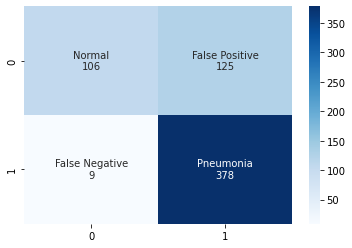

In [77]:
#confusion matrix as heat map

import seaborn as sns
c_matrix =confusion_matrix(y_test, y_test_nn)


group_names = ['Normal', 'False Positive', 'False Negative', 'Pneumonia']
group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2  in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')